# Ex 8

In [1]:
import numpy as np
import matplotlib as mpl
import scipy as sp
from matplotlib import pyplot as plt
from scipy.special import jv, factorial, jn_zeros

In [2]:
plt.style.use(['science', 'notebook', 'grid'])

### Q1

In [3]:
def j_n_series(x, n, m):
    sum = 0
    for i in range(m):
        sum += ((-1)**i * (x/2)**(2*i+n))/(factorial(i) * factorial(i+n))
    return sum

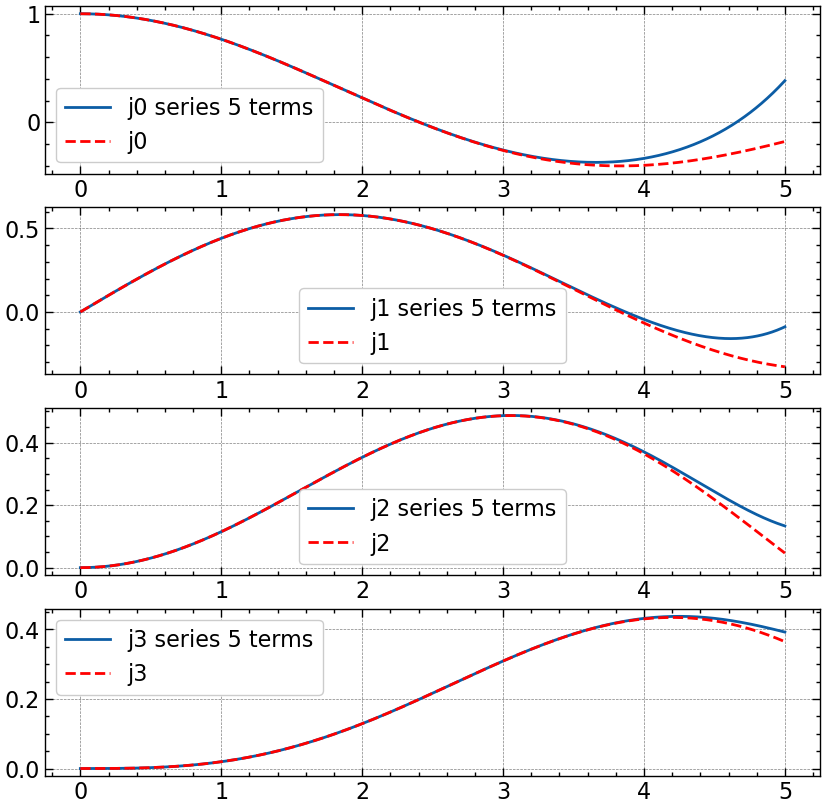

In [4]:
max_nu = 4
num_terms = 5

fig, ax = plt.subplots(max_nu, 1, figsize=(10, 10))
x = np.linspace(0, 5, 1000)
for nu in range(max_nu):
    j_i = j_n_series(x, nu, num_terms)
    ax[nu].plot(x, j_i, label=f'j{nu} series {num_terms} terms')
    ax[nu].plot(x, jv(nu, x), '--r',label=f'j{nu}')
    ax[nu].legend()

### Q3

In [5]:
%matplotlib inline
from ipywidgets import interact, FloatSlider

c = 1

def solution_a(t):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    r = np.linspace(0, 1, 100)
    theta = np.linspace(0, 2*np.pi, 100)
    R, THETA = np.meshgrid(r, theta)
    k01 = jn_zeros(0, 1)
    k31 = jn_zeros(3, 1)
    k23 = jn_zeros(2, 3)[-1]
    psi = jv(0, r*k01)*np.cos(c*k01*t) + 2*jv(3, R*k31)*np.cos(c*k31*t)*np.sin(3*THETA) + (1/(c*k23))*jv(2, R*k23)*np.sin(c*k23*t)*np.cos(2*THETA)
    X, Y = R*np.cos(THETA), R*np.sin(THETA)

    ax.plot_surface(X, Y, psi, cmap=plt.cm.YlGnBu_r)


    ax.set_zlim(-1, 1)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel(r'$\psi(r,\theta)$')
    ax.set_title(f't={t}')
    ax.view_init(15, 140)

interact(solution_a, 
         t = FloatSlider(min=0, max=4, step=0.05, value=0))

interactive(children=(FloatSlider(value=0.0, description='t', max=4.0, step=0.05), Output()), _dom_classes=('w…

<function __main__.solution_a(t)>